## Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## Exploratory Data Analysis

In [2]:
# reading train data
train=pd.read_csv(r"D:\Data Science\titanic-train.csv")

# reading test data
test=pd.read_csv(r"D:\Data Science\titanic-test.csv") 

In [5]:
# printing first five rows of the data set
train.head() #5 data teratas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# number of rows and columns
train.shape 

(891, 12)

In [8]:
# info of dataframe
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# number of null values in dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# return dataframe that contains information of train data
listItem = []
for col in train.columns :
    listItem.append([col, train[col].dtype, train[col].isna().sum(), round((train[col].isna().sum()/len(train[col])) * 100,2),
                    train[col].nunique(), list(train[col].drop_duplicates().values)])

In [12]:
listItem[1:3]

[['Survived', dtype('int64'), 0, 0.0, 2, [0, 1]],
 ['Pclass', dtype('int64'), 0, 0.0, 3, [3, 1, 2]]]

In [13]:
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,PassengerId,int64,0,0.00,891,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Survived,int64,0,0.00,2,"[0, 1]"
2,Pclass,int64,0,0.00,3,"[3, 1, 2]"
3,Name,object,0,0.00,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B..."
4,Sex,object,0,0.00,2,"[male, female]"
5,Age,float64,177,19.87,88,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
6,SibSp,int64,0,0.00,7,"[1, 0, 3, 4, 2, 5, 8]"
7,Parch,int64,0,0.00,7,"[0, 1, 2, 5, 3, 4, 6]"
8,Ticket,object,0,0.00,681,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803..."
9,Fare,float64,0,0.00,248,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."


In [15]:
print('count of Survived')
print(train['Survived'].value_counts())
print('% of Survived')
print(train['Survived'].value_counts(normalize=True)*100)

count of Survived
0    549
1    342
Name: Survived, dtype: int64
% of Survived
0    61.616162
1    38.383838
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Survived', ylabel='count'>

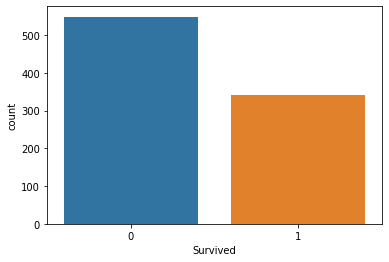

In [16]:
# countplot
sns.countplot(x='Survived', data=train)

In [17]:
print('count of sex')
print(train['Sex'].value_counts())
print('% of Sex')
print(train['Sex'].value_counts(normalize=True)*100)

count of sex
male      577
female    314
Name: Sex, dtype: int64
% of Sex
male      64.758698
female    35.241302
Name: Sex, dtype: float64


<AxesSubplot:xlabel='Sex', ylabel='count'>

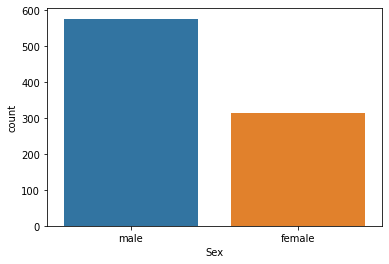

In [18]:
# countplot
sns.countplot(x='Sex', data=train)

In [19]:
print('count of Pclass')
print(train['Pclass'].value_counts())
print('% of Pclass')
print(train['Pclass'].value_counts(normalize=True)*100)

count of Pclass
3    491
1    216
2    184
Name: Pclass, dtype: int64
% of Pclass
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

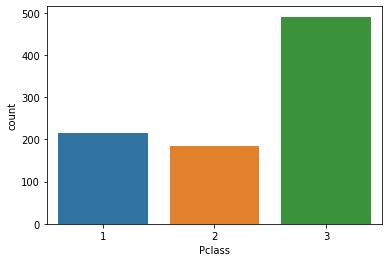

In [20]:
sns.countplot(x='Pclass', data=train)

In [21]:
print('count of Embarked')
print(train['Embarked'].value_counts())
print('% of Embarked')
print(train['Embarked'].value_counts(normalize=True)*100)

count of Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64
% of Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

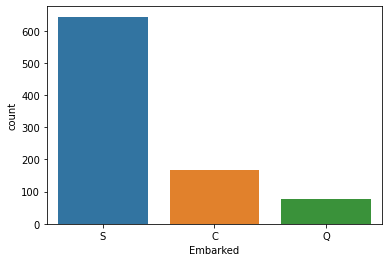

In [22]:
sns.countplot(x='Embarked', data=train)

In [23]:
print('count of SibSp')
print(train['SibSp'].value_counts())
print('% of SibSp')
print(train['SibSp'].value_counts(normalize=True)*100)

count of SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
% of SibSp
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

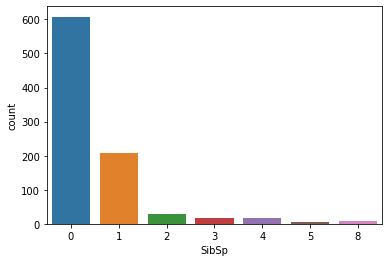

In [24]:
sns.countplot(x='SibSp', data=train)

Visualizing survival based on the gender.

<AxesSubplot:xlabel='Sex', ylabel='Count'>

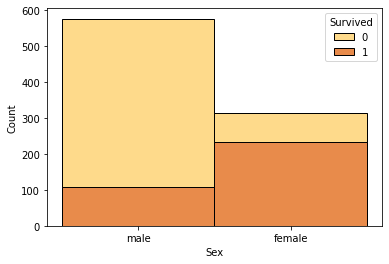

In [27]:
sns.histplot(train, x = "Sex", hue = "Survived", multiple = "stack", palette = "YlOrBr")

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

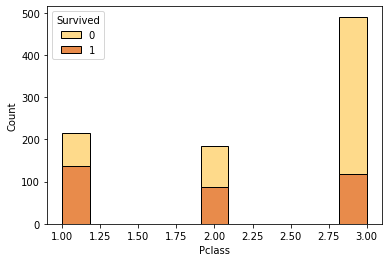

In [26]:
sns.histplot(train, x = "Pclass", hue = "Survived", multiple = "stack", palette = "YlOrBr")

<AxesSubplot:xlabel='Embarked', ylabel='Count'>

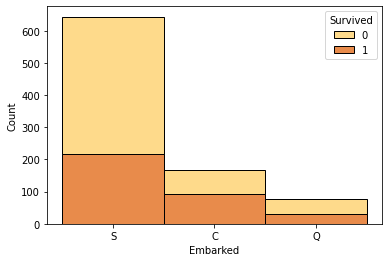

In [28]:
sns.histplot(train, x = "Embarked", hue = "Survived", multiple = "stack", palette = "YlOrBr")

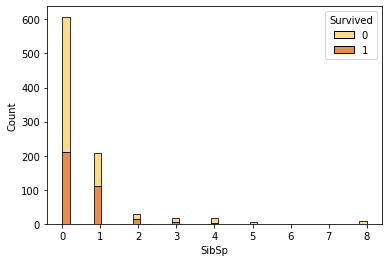

In [26]:
sns.histplot(train, x = "SibSp", hue = "Survived", multiple = "stack", palette = "YlOrBr")

Plotting the same graph but with ratio instead.

Now, visualizing survival based on the fare.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

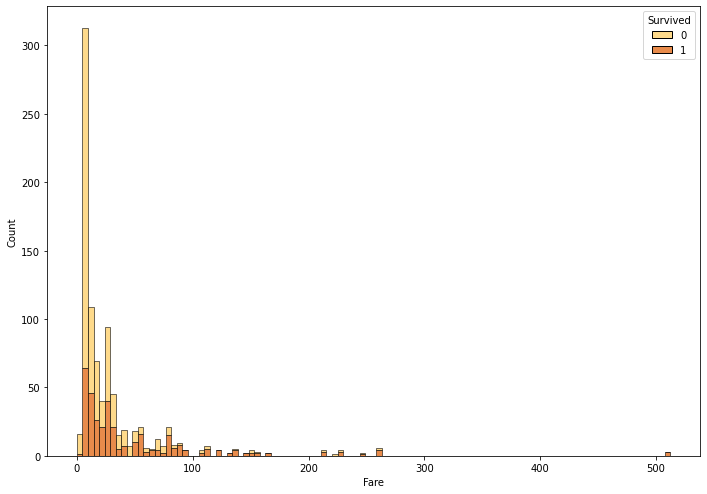

In [29]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
sns.histplot(train, x = "Fare", hue = "Survived", multiple = "stack", palette = "YlOrBr")

Passengers with cheaper ticket fares are more likely to die. Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

## Cleaning the  train dataset

In [30]:
# dropping umwanted columns
df1=train.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [31]:
# Converting categorical feature to numeric
df1.Sex=df1.Sex.map({'female':0, 'male':1})
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


In [34]:
df1.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [32]:
df1.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.389108
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.539926
dtype: float64

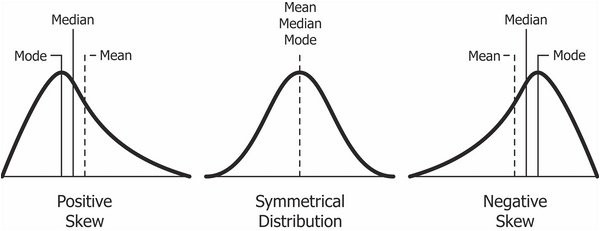

In [35]:
# median age of each sex
median_age_men=df1[df1['Sex']==1]['Age'].median()
median_age_women=df1[df1['Sex']==0]['Age'].median()

In [38]:
median_age_men

29.0

In [37]:
median_age_women

27.0

In [39]:
# filling null values in 'Age' with respective median age
df1.loc[(df1.Age.isnull()) & (df1['Sex']==0),'Age']=median_age_women
df1.loc[(df1.Age.isnull()) & (df1['Sex']==1),'Age']=median_age_men

In [40]:
df1.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
53,1,2,0,29.0,1,0,26.0000,0
174,0,1,1,56.0,0,0,30.6958,1
679,1,1,1,36.0,0,1,512.3292,1
603,0,3,1,44.0,0,0,8.0500,0
521,0,3,1,22.0,0,0,7.8958,0


In [41]:
# checking for null values
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

Two null values in Embarked column

In [43]:
# dropping rows with null value
df1.dropna(inplace=True)

In [44]:
# Data is cleaned to have no null value
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [46]:
df1.shape

(889, 8)

In [45]:
# cleaned dataset
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


## Feature Scaling

In [47]:
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))

In [48]:
df1.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.649044,0.364099,0.524184,0.382452,0.062649
std,0.486260,0.834700,0.477538,0.163160,1.103705,0.806761,0.097003
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015412
50%,0.000000,3.000000,1.000000,0.359135,0.000000,0.000000,0.028213
75%,1.000000,3.000000,1.000000,0.434531,1.000000,0.000000,0.060508
max,1.000000,3.000000,1.000000,1.000000,8.000000,6.000000,1.000000


## Data Modelling

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(['Survived'], axis=1),
    df1.Survived,
    test_size= 0.2,
    random_state=0,
    stratify=df1.Survived
)

- **Logistic Regression**

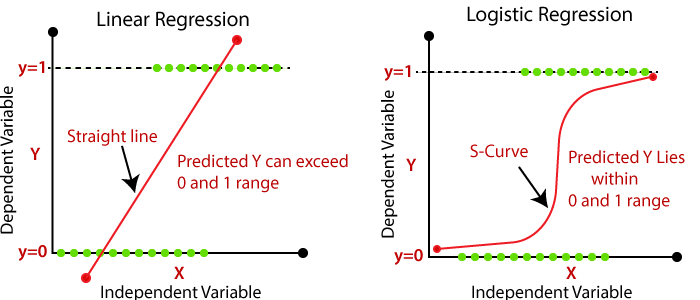

In [51]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

Y_pred = clf.predict(X_test)
accuracy_score(y_test, Y_pred)

0.8370786516853933

## Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, Y_pred)
cm

array([[97, 13],
       [16, 52]], dtype=int64)

<AxesSubplot:>

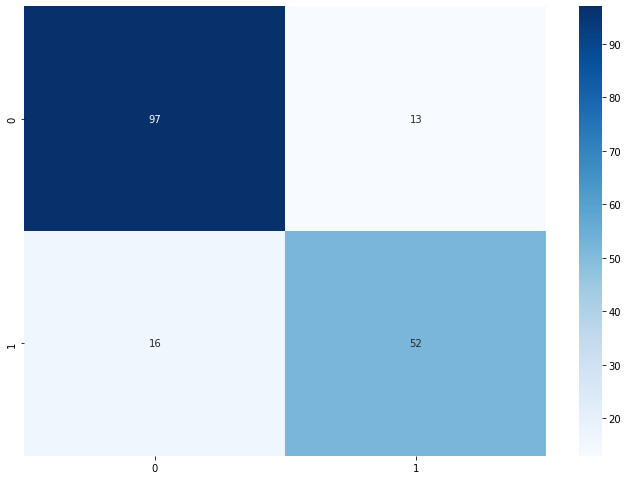

In [53]:
sns.heatmap(cm, annot=True,cmap='Blues')

In [54]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

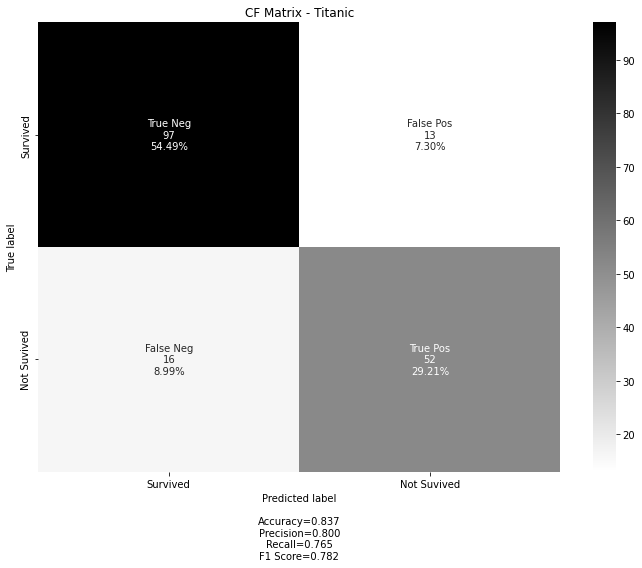

In [55]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Survived', 'Not Suvived']
make_confusion_matrix(cm, group_names=labels, categories=categories, cmap='binary', title='CF Matrix - Titanic')

## Cleaning test dataset

In [56]:
# test dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [57]:
# dropping unwanted columns
df2=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [58]:
# Converting categorical feature to numeric
df2.Sex=df2.Sex.map({'female':0, 'male':1})
df2.Embarked=df2.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'nan'})
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [59]:
# Checking for null values
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [60]:
df2.skew()

Pclass     -0.534170
Sex        -0.568991
Age         0.457361
SibSp       4.168337
Parch       4.654462
Fare        3.687213
Embarked    1.162115
dtype: float64

In [61]:
# median age of each sex
median_age_men2=df2[df2['Sex']==1]['Age'].median()
median_age_women2=df2[df2['Sex']==0]['Age'].median()

In [62]:
# filling null values with respective median age
df2.loc[(df2.Age.isnull()) & (df2['Sex']==0),'Age']=median_age_women2
df2.loc[(df2.Age.isnull()) & (df2['Sex']==1),'Age']=median_age_men2

In [63]:
# filling null values with median fare
df2['Fare']=df2['Fare'].fillna(df2['Fare'].median())

In [65]:
df2.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [66]:
# cleaned dataset
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [67]:
# feature scaling
df2.Age = (df2.Age-min(df2.Age))/(max(df2.Age)-min(df2.Age))
df2.Fare = (df2.Fare-min(df2.Fare))/(max(df2.Fare)-min(df2.Fare))

In [68]:
# test dataset
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,0.015282,2
1,3,0,0.617566,1,0,0.013663,0
2,2,1,0.815377,0,0,0.018909,2
3,3,1,0.353818,0,0,0.016908,0
4,3,0,0.287881,1,1,0.023984,0


## Prediction

In [69]:
pred = clf.predict(df2)

In [70]:
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": pred
    })
submission.to_csv('submission.csv', index=False)

In [72]:
pred_df = pd.read_csv('submission.csv')

<AxesSubplot:xlabel='Survived', ylabel='count'>

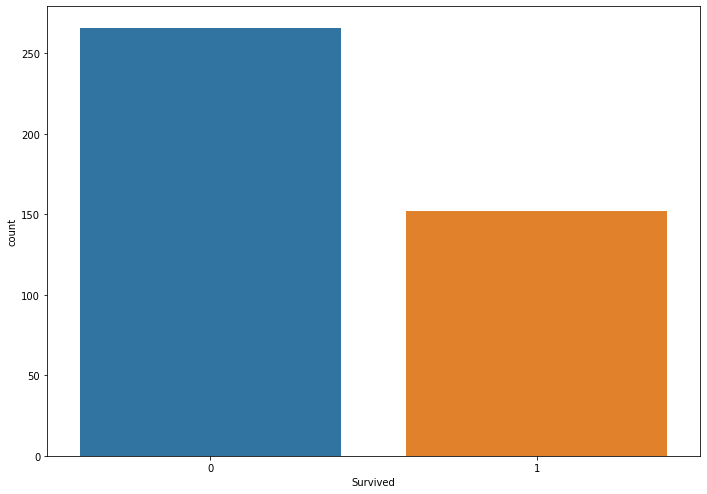

In [73]:
# visualizing predicted values
sns.countplot(x='Survived', data=pred_df)

In [75]:
from sklearn.model_selection import cross_val_score

In [76]:
scores = cross_val_score(
     clf, df1.drop(['Survived'], axis=1), df1['Survived'], cv=5, scoring='accuracy')

In [77]:
np.mean(scores)

0.79417888656129